<a href="https://colab.research.google.com/github/OlajumokeGColab/FakeNewsDissertation/blob/main/naive_bayes_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-23378bec6da5>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  fake_df.columns = ((fake_df.columns.str).replace("^ ","")).str.replace(" $","")
<ipython-input-1-23378bec6da5>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  fake_df.columns = ((fake_df.columns.str).replace("^ ","")).str.replace(" $","")
<ipython-input-1-23378bec6da5>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  real_df.columns = ((real_df.columns.str).replace("^ ","")).str.replace(" $","")
<ipython-input-1-23378bec6da5>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  real_df.columns = ((real_df.columns.str).replace("^ ","")).str.replace(" $","")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object


1    23481
0    21417
Name: isFake, dtype: int64

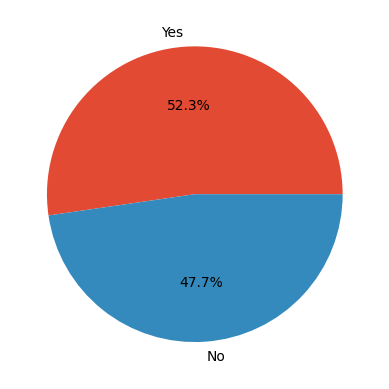

In [ ]:
#loading the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
plt.style.use('ggplot')

# Since Jupyter notebook is used, include:
%matplotlib inline

# Load your dataset


with open ('/content/drive/MyDrive/Fake.csv', "r") as file:
        fake_df = pd.read_csv(file, delimiter = ",")
        fake_df.columns = ((fake_df.columns.str).replace("^ ","")).str.replace(" $","")

with open ('/content/drive/MyDrive/True.csv', "r") as file:
        real_df = pd.read_csv(file, delimiter = ",")
        real_df.columns = ((real_df.columns.str).replace("^ ","")).str.replace(" $","")


# fake_df = pd.read_csv('/content/drive/MyDrive/Fake.csv')
# real_df = pd.read_csv('/content/drive/MyDrive/True.csv')

fake_df.info()      # Returns a concise summary of dataset
real_df.info()      # Returns a concise summary of dataset

fake_df.head()
real_df.head()
# Handle missing values
fake_df.dropna(inplace=True)
real_df.dropna(inplace=True)

#confirm the size of null values if any
fake_df.isnull().sum()
real_df.isnull().sum()

# Remove irrelevant features. They are removed because they will not contribute to model fitting
fake_df.drop(['date'], axis=1, inplace=True)
real_df.drop(['date'], axis=1, inplace=True)
# fake_df.drop(['date', 'text', 'subject'], axis=1, inplace=True)
# real_df.drop(['date', 'text', 'subject'], axis=1, inplace=True)

#classification
fake_df['isFake'] = 1 #1 means true (that implies the news is fake)
real_df['isFake'] = 0  #0 means false (that implies the news is NOT fake)

#uncomment to see categories in the plots (Class Visualization Using Bar Chart)
# fake_df['isFake'] = 'Yes' #1 means true (that implies the news is fake)
# real_df['isFake'] = 'No'  #0 means false (that implies the news is NOT fake)

# Taking a look at the target variable
real_df.isFake.value_counts()       # The value_counts() function is used to get a Series containing counts of unique values.

#combine both fake_df and real_df into one for further cleaning

data = pd.concat([fake_df,real_df])
data.info()      # Returns a concise summary of dataset

data.isnull().sum() / len(data) * 100   # To get percentage of missing data in each column. Notice, we don't have any column with missing value.

#check data shape
data.shape
piechart=data['isFake'].value_counts()
label=('Yes','No')
plt.pie(piechart,labels=label,autopct='%1.1f%%')
piechart

In [ ]:
data.title.value_counts()
# data.text.value_counts()
# data.subject.value_counts()

Factbox: Trump fills top jobs for his administration                                                                             14
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                                                  8
Factbox: Contenders for senior jobs in Trump's administration                                                                     8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                                         6
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                             6
                                                                                                                                 ..
“SNEAKY” School Caught Red Handed Recruiting Kids To Work For The Clinton Campaign                                                1
FEEL THE BERN: Supporters Line Up At 4:30 A.M. To See Trump…In Bernie Sander

In [ ]:
# Remove Stop Words
#import libraries to help remove stop words
import nltk
import re
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def cleanTxt(text):
    text = re.sub('\w+:\/\/\S+', '', text)# remove hyperlink
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'@\w+|#\w+', '', text) #remove @mentions
    text.lower() #the model should detect both lower and upper case characters, therefore all text will be lower case
    return text
# data['title']=data['title'].apply(cleanTxt)
# data['text']=data['text'].apply(cleanTxt)

nltk.download('stopwords')
#stemming,remove stop words and numbers
stopwords_english = stopwords.words('english')
stemmer = PorterStemmer()

def stemming(text):
    text = text.split()
    text=[stemmer.stem(y) for y in text]
    return " " .join(text)

def remove_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stopwords_english]
    return " ".join(Text)

# def normalize_title(df):
#     df.title=df.title.apply(lambda title : remove_stop_words(title))
#     df.title=df.title.apply(lambda title : stemming(title))
#     df.title=df.title.apply(lambda title : remove_numbers(title))
#     return df

def normalize_text(df):
    df.text=df.text.apply(lambda text : remove_stop_words(text))
    df.text=df.text.apply(lambda text : stemming(text))
    df.text=df.text.apply(lambda text : remove_numbers(text))
    return df

# normalize_title(data)
# normalize_text(data)
#text after preprocessing
data.head(3)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,text,subject,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,1


In [ ]:
import tensorflow as tf
keras = tf.keras
Tokenizer = keras.preprocessing.text.Tokenizer

#Tokenization
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(data)

In [ ]:
data['title'].head()
data['text'].head()
# data['subject'].head()

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
2    On Friday, it was revealed that former Milwauk...
3    On Christmas day, Donald Trump announced that ...
4    Pope Francis used his annual Christmas Day mes...
Name: text, dtype: object

<Axes: xlabel='isFake'>

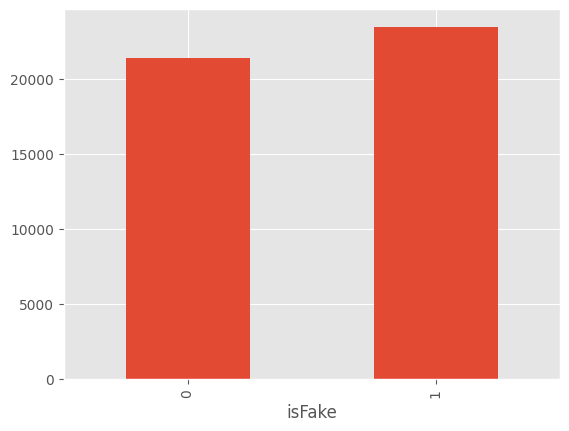

In [ ]:
#Class Visualization Using Bar Chart
# data['isFake'].value_counts().plot(kind='bar')
data.groupby('isFake').size().plot(kind='bar')
#data['isFake'].value_counts(sort=False).plot.bar(rot=0)

In [ ]:
#Assessing all the categorical columns and numerical columns
cat_cols = data.select_dtypes(include = 'object').columns    # getting all the categorical columns
cat_cols
num_cols = data.select_dtypes(include=np.number).columns      # getting all the numerical columns
num_cols

Index(['isFake'], dtype='object')

In [ ]:
# Separate input features and output feature
X = data.drop(columns = ['isFake'])       # input features
Y = data.isFake


#To avoid data leakage,the train-test split technique will be employed.
#The train-test split technique (also known as hold-out) involves dividing the available data into two parts: one dedicated to training and the other to evaluation.

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# X_train: independent feature data for training the model
# Y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# Y_test: original target values of X_test; We will compare this values with our predicted values.

# test_size = 0.3: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code



In [ ]:
#Class Imbalance assessment
data.isFake.value_counts()

1    23481
0    21417
Name: isFake, dtype: int64

In [ ]:
#Handling Class Imbalancing Issue using Undersampling.
#Undersampling can be defined as removing some observations of the majority class

<Axes: xlabel='isFake'>

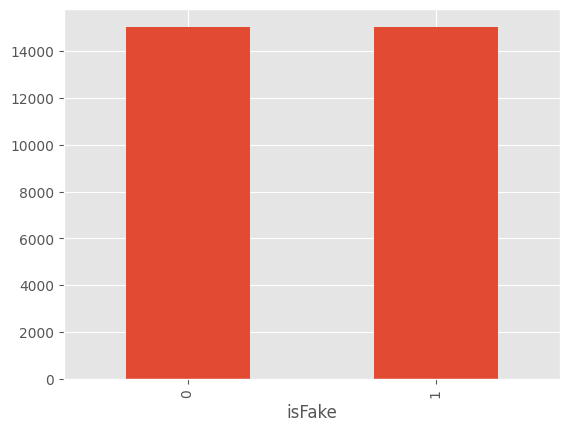

In [ ]:
# Handling Class Imbalancing Issue for *train* data using Undersampling.

# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

# separate minority and majority class
not_fake = train_data[train_data.isFake==0]
fake = train_data[train_data.isFake==1]

# 'resample' is located under sklearn.utils
from sklearn.utils import resample

# Unsample minority; we are oversampling the minority class to match the number of majority class
fake_balanced = resample(fake,
                           replace = True, # Sample with replacement
                           n_samples = len(not_fake), # Match number in majority class
                           random_state=27)

# combine majority and upsampled minority
balanced_train_data = pd.concat([not_fake, fake_balanced])

# Now, check the classes count for train data shows the classes are now equal
balanced_train_data.isFake.value_counts()
balanced_train_data.groupby('isFake').size().plot(kind='bar')

<Axes: xlabel='isFake'>

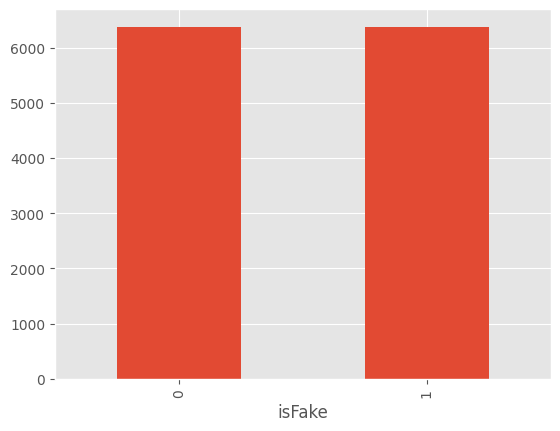

In [ ]:
# Handling Class Imbalancing Issue for *test* data using Undersampling.

# concatenate testing data back together
test_data = pd.concat([X_test, Y_test], axis = 1)

# separate minority and majority class
not_fake = test_data[test_data.isFake==0]
fake = test_data[test_data.isFake==1]

# 'resample' is located under sklearn.utils
from sklearn.utils import resample

# Unsample minority; we are oversampling the minority class to match the number of majority class
fake_balanced = resample(fake,
                           replace = True, # Sample with replacement
                           n_samples = len(not_fake), # Match number in majority class
                           random_state=27)

# combine majority and upsampled minority
balanced_test_data = pd.concat([not_fake, fake_balanced])

# Now, check the classes count for test data shows the classes are now equal
balanced_test_data.isFake.value_counts()
balanced_test_data.groupby('isFake').size().plot(kind='bar')

In [ ]:
#Proper resampling of the train data using k-fold cross validation
#Split the train data into 10 smaller samples, i.e. k=10
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 10

# Get the fold indices
fold_indices = kfold_indices(balanced_train_data, k)
fold_indices #10 smaller samples

[(array([ 3007,  3008,  3009, ..., 30073, 30074, 30075]),
  array([   0,    1,    2, ..., 3004, 3005, 3006])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([3007, 3008, 3009, ..., 6011, 6012, 6013])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([6014, 6015, 6016, ..., 9018, 9019, 9020])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([ 9021,  9022,  9023, ..., 12025, 12026, 12027])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([12028, 12029, 12030, ..., 15032, 15033, 15034])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([15035, 15036, 15037, ..., 18039, 18040, 18041])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([18042, 18043, 18044, ..., 21046, 21047, 21048])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([21049, 21050, 21051, ..., 24053, 24054, 24055])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([24056, 24057, 2

In [ ]:
balanced_train_data.head(5)

,title,text,subject,isFake
18187,ICAN chief's message to Trump and Kim: nuclear...,GENEVA (Reuters) - The head of the Nobel Peace...,worldnews,0
3329,Hawaii enacts law committing to goals of Paris...,SEATTLE (Reuters) - Hawaii has become the firs...,politicsNews,0
7486,Trump's chance of victory skyrockets on bettin...,NEW YORK (Reuters) - Online trading platform P...,politicsNews,0
2591,Massachusetts cannot hold immigrants so U.S. c...,BOSTON (Reuters) - Massachusetts police do not...,politicsNews,0
17903,Turkish PM says Idlib operation aims to preven...,ANKARA (Reuters) - Turkey s military operation...,worldnews,0


In [ ]:
# Separate input features and output feature (for balanced train data)
X_train = balanced_train_data.drop(columns = ['isFake'])       # input features
# Y_train = balanced_train_data.isFake
Y_train = balanced_train_data.drop(columns = ['title'])

# Separate input features and output feature (for balanced test data)
X_test = balanced_test_data.drop(columns = ['isFake'])       # input features
# Y_test = balanced_test_data.isFake
Y_test = balanced_test_data.drop(columns = ['title'])

In [ ]:
X_train.head(5)

,title,text,subject
18187,ICAN chief's message to Trump and Kim: nuclear...,GENEVA (Reuters) - The head of the Nobel Peace...,worldnews
3329,Hawaii enacts law committing to goals of Paris...,SEATTLE (Reuters) - Hawaii has become the firs...,politicsNews
7486,Trump's chance of victory skyrockets on bettin...,NEW YORK (Reuters) - Online trading platform P...,politicsNews
2591,Massachusetts cannot hold immigrants so U.S. c...,BOSTON (Reuters) - Massachusetts police do not...,politicsNews
17903,Turkish PM says Idlib operation aims to preven...,ANKARA (Reuters) - Turkey s military operation...,worldnews


In [ ]:
Y_train.head(5)

,text,subject,isFake
18187,GENEVA (Reuters) - The head of the Nobel Peace...,worldnews,0
3329,SEATTLE (Reuters) - Hawaii has become the firs...,politicsNews,0
7486,NEW YORK (Reuters) - Online trading platform P...,politicsNews,0
2591,BOSTON (Reuters) - Massachusetts police do not...,politicsNews,0
17903,ANKARA (Reuters) - Turkey s military operation...,worldnews,0


In [ ]:
X_train.shape

(30076, 3)

In [ ]:
Y_train.shape

(30076, 3)

In [ ]:
X_train

,title,text,subject
18187,ICAN chief's message to Trump and Kim: nuclear...,GENEVA (Reuters) - The head of the Nobel Peace...,worldnews
3329,Hawaii enacts law committing to goals of Paris...,SEATTLE (Reuters) - Hawaii has become the firs...,politicsNews
7486,Trump's chance of victory skyrockets on bettin...,NEW YORK (Reuters) - Online trading platform P...,politicsNews
2591,Massachusetts cannot hold immigrants so U.S. c...,BOSTON (Reuters) - Massachusetts police do not...,politicsNews
17903,Turkish PM says Idlib operation aims to preven...,ANKARA (Reuters) - Turkey s military operation...,worldnews
...,...,...,...
6474,WATCH: Jehovah’s Witnesses Create Cartoon To ...,Apparently tired of people slamming doors in t...,News
7693,Trump Bails On CPAC And Republicans Are Now B...,It looks as though the man most likely to get ...,News
906,Angela Merkel’s Husband Is Taking Melania And...,While spouses are a tradition at the G-20 Summ...,News
11618,HILARIOUS! LIBERALS STUNNED When Republican Gu...,"On Saturday, MSNBC s Joy Reid repeatedly attem...",politics


In [ ]:
print(X_train.columns.tolist())

['title', 'text', 'subject']


In [ ]:

#import relevant libraries
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  # Replace with each model that works with numeric data
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve
from sklearn.metrics import roc_auc_score



#specify functions to train data and report/plot accuracies
from keras import backend as K
def f1(y_true, y_pred):
    '''
    metric from here
    https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras
    '''
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    print("precision: ",precision)
    print("recall: ",recall)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def train(model , model_name):
    model.fit(X_train,Y_train)
    print("")
    print("Training Data Results")
    print(f"Training accuracy of {model_name} is {model.score(X_train,Y_train)}")
    # print("f1-score: ",f1(Y_train, model.predict(X_train).astype(float)))

    train_pred = model.predict(X_train).astype(float)
    print("f1-score: ",f1(Y_train, train_pred))
    ROC_AUC = roc_auc_score(Y_train, train_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))


    print("")

    print("Testing Data Results")
    print(f"Testing accuracy of {model_name} is {model.score(X_test,Y_test)}")
    # print(f"Prediction of {model_name} is {model.predict(X_test)}")
    test_pred = model.predict(X_test).astype(float)
    print("f1-score: ",f1(Y_test, test_pred))
    ROC_AUC = roc_auc_score(Y_test, test_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test,cmap=plt.cm.Blues
    )
def class_report(model):
    print(classification_report(
        Y_test,
        model.predict(X_test)
    ))

#function for Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
def matrix(y_test,y_pred,labels):
  cm = confusion_matrix(y_test, y_pred, labels=labels)
  matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
  return matrix






K-Fold Cross-Validation Scores: [0.960950259836674, 0.960950259836674, 0.960950259836674, 0.960950259836674, 0.960950259836674, 0.960950259836674, 0.960950259836674, 0.960950259836674, 0.960950259836674, 0.960950259836674]
Mean Accuracy: 0.960950259836674

Training Data Results
Training accuracy of NaїveBayes is 0.9704085528827797
precision:  tf.Tensor(0.9750061109693534, shape=(), dtype=float64)
recall:  tf.Tensor(0.9683782471414883, shape=(), dtype=float64)
f1-score:  tf.Tensor(0.9716808269739599, shape=(), dtype=float64)
ROC AUC : 0.9705

Testing Data Results
Testing accuracy of NaїveBayes is 0.960950259836674
precision:  tf.Tensor(0.9611387900219055, shape=(), dtype=float64)
recall:  tf.Tensor(0.9638829407428425, shape=(), dtype=float64)
f1-score:  tf.Tensor(0.9625088594660699, shape=(), dtype=float64)
ROC AUC : 0.9608


Text(0.5, 1.0, 'Naїve Bayes Confusion Matrix')

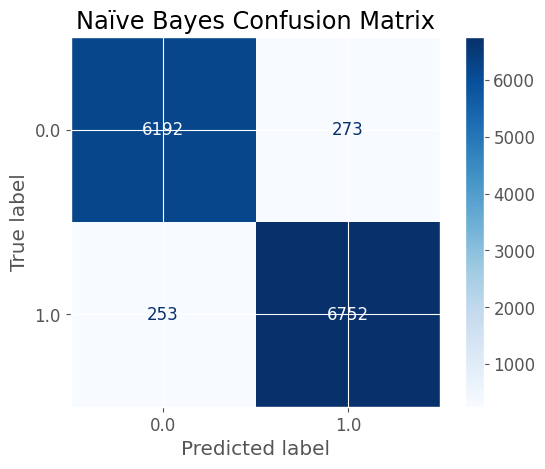

In [ ]:
#split into test and train for Naїve Bayes Algorithm
X=data["text"].values
Y=data["isFake"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 40)

#convert to float to avoid Tensorflow InvalidArgumentError
Y_test = Y_test.astype(float)
# X_test = X_test.astype(float)
Y_train = Y_train.astype(float)
# X_train = X_train.astype(float)


#Naїve Bayes

#testing Naїve Bayes with CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
#cv = CountVectorizer(lowercase=False)

baseline = Pipeline([('vect', CountVectorizer(lowercase=False)),('clf', MultinomialNB())])
baseline.fit(X_train, Y_train)
y_pred = baseline.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, Y_test))
# print(classification_report(Y_test, y_pred))




# Initialize a list to store the evaluation scores
scores = []

# Iterate through each fold
for train_indices, test_indices in fold_indices:
    #1. Logistic Regression
    # Train the model on the training data
    baseline.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = baseline.predict(X_test)

    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(Y_test, y_pred)

    # Append the fold score to the list of scores
    scores.append(fold_score)


# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)



train(baseline, 'NaїveBayes')
disp = ConfusionMatrixDisplay.from_estimator(
        baseline,
        X_test,
        Y_test,cmap=plt.cm.Blues
    )
disp.ax_.set_title("Naїve Bayes Confusion Matrix")


# Support is the actual number of occurrences of the class in the dataset.

# Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

# Precision = TP/TP+FP

# Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.

# Recall = TP/TP+FN

# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

# F1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

# F1 Score = 2(Recall Precision) / (Recall + Precision)

# For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/ : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

# TP:- True positive
# FP:- False positive
# FN:- False negative
# TN:-True Negative

# Precision= TP/(TP+FP)
# Recall=TP/(TP+FN)
# F1 score=2*(P * R)/(P+R)
# where, P is Precision and R is Recall.
# Higher is the F1 score better is the performance on model.

In [ ]:
X_train.shape

(31428,)

In [ ]:
Y_train.shape

(31428,)

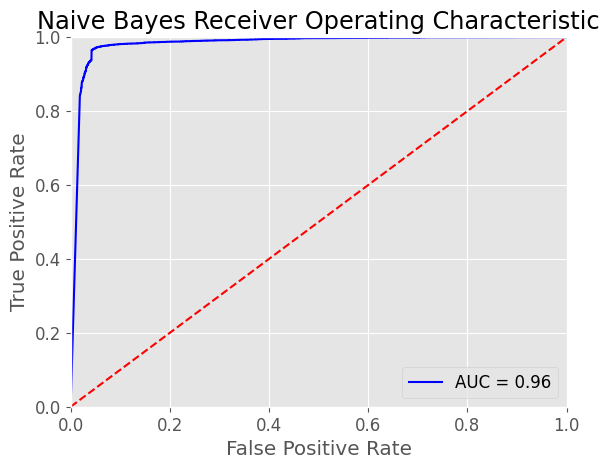

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
# calculate the fpr and tpr for all thresholds of the classification
probs = baseline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = roc_auc_score(Y_test, y_pred)

#load the pyplot tool from matplotlib library
import matplotlib.pyplot as plt
plt.title('Naive Bayes Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Y_test = Y_test.astype(float)
print(Y_test.dtype)

float64


In [ ]:
y_pred = y_pred.astype(float)
print(y_pred.dtype)

float64
